In [7]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from utils.utils import count_houses, plot_ratio_map
import osmnx as ox
from catastro.atom import ATOM_Query
import os
import json
from data_processing.data_preprocessing import city
import matplotlib.pyplot as plt

In [2]:
bcn = city("barcelona","Barcelona","Barcelona, Catalonia, Spain", "2025-06-12")

In [ ]:

bcn.get_results('data/results/barcelona.geojson')

Downloaded parcels for barcelona in Barcelona.
Using cached Airbnb data from data/cache/barcelona/listings.csv
Shapefile already exists in data/seccionado_2025, skipping download.
Computed ratios for flats and rooms in the city.


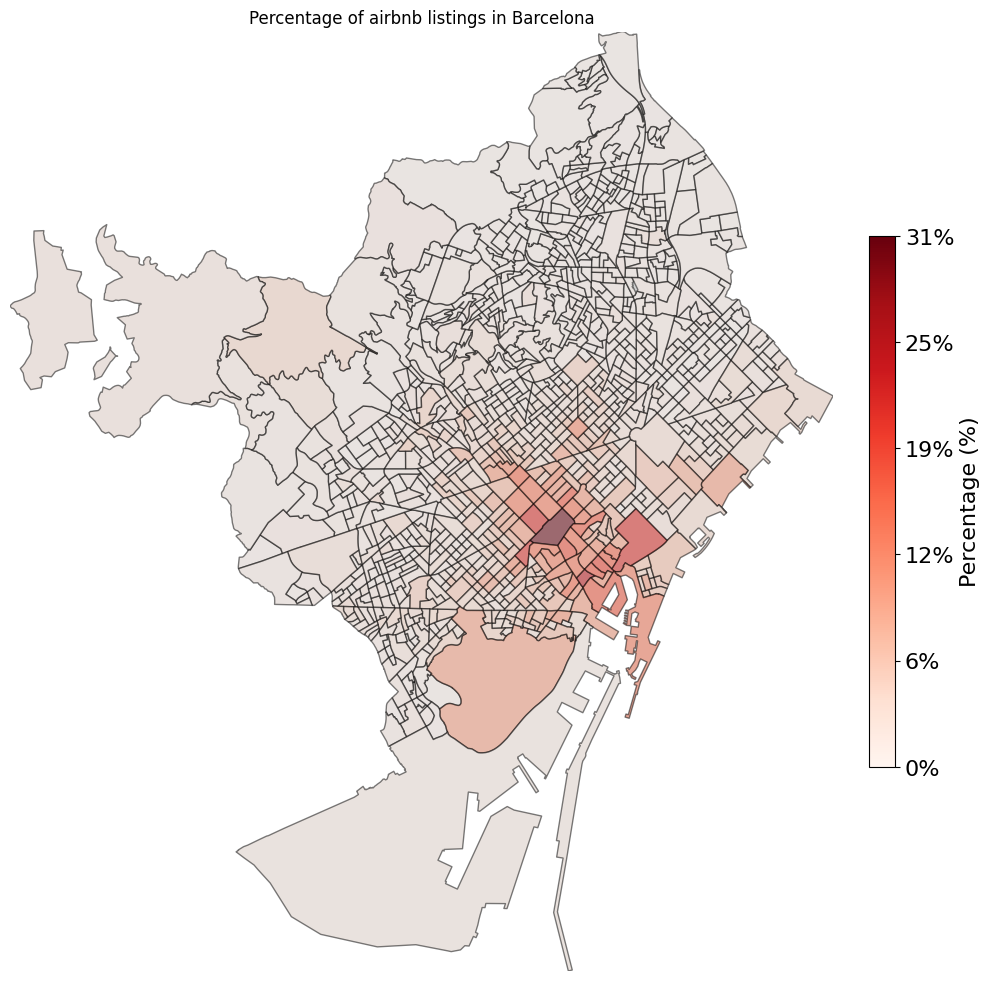

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_ratio_map(bcn.results, bcn.censal_sections, ax, title="Percentage of airbnb listings in Barcelona")

In [18]:
# If you get "ValueError: Trailing data", try reading the file with lines=True
cosas = pd.read_json('data/cities.json', orient='records', lines=True)

In [19]:
cosas

,city,province,insideabnb_handle,dates
0,barcelona,Barcelona,"Barcelona, Catalonia, Spain",2025-06-12
1,euskadi,Pais Vasco,"Euskadi, Euskadi, Spain",2025-03-27
2,girona,Girona,"Girona, Catalonia, Spain",2025-03-27
3,madrid,Madrid,"Madrid, Comunidad de Madrid, Spain",2025-06-12
4,malaga,Malaga,"Malaga, Andalucía, Spain",2025-03-28
5,mallorca,Islas Baleares,"Mallorca, Islas Baleares, Spain",2025-06-15
6,menorca,Islas Baleares,"Menorca, Islas Baleares, Spain",2025-06-29
7,sevilla,Sevilla,"Sevilla, Andalucía, Spain",2025-03-26
8,valencia,Valencia,"Valencia, Valencia, Spain",2025-06-20


In [14]:
dates = [  
    "2025-06-12",
    "2025-03-27",
    "2025-03-27",
    "2025-06-12",
    "2025-03-28",
    "2025-06-15",
    "2025-06-29",
    "2025-03-26",
    "2025-06-20",
    
]

In [15]:
cosas['dates'] = dates

In [17]:
cosas.to_json('data/cities.json', orient='records', lines=True)